# Exploratory Network Data Analysis: 
This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.

Note that these statistics were compiled by combining the ego-networks, including the ego nodes themselves (along with an edge to each of their friends).

J. McAuley and J. Leskovec. Learning to Discover Social Circles in Ego Networks. NIPS, 2012.


In [2]:
import networkx as nx
import matplotlib.pyplot as plt


def load_facebook_data(file_path='facebook_combined.txt'): # getting data from loaded file
    edges = []
    
    with open(file_path, 'r') as file_connection: 
        for line in file_connection: # line by line looping
            if line.strip(): # check if line is empty after ridding it of white space
                parts = line.strip().split() # splitting line into list of strings 
                if len(parts) == 2: # if there are 2 elements because in the split list
                    edges.append((int(parts[0]), int(parts[1]))) # convert the 2 string elements into integers and add them as a tuple into the original list for edges
    
    return edges

# calling function to populate edges of the file 
edges = load_facebook_data('facebook_combined.txt')

# building undirected graph (facebook friend relationships go both ways) and adding edges from list of tuples 
g = nx.Graph()
g.add_edges_from(edges)

print(f"Network Info: {g.number_of_nodes()} nodes, {g.number_of_edges()} edges")
print(f"Average degree: {sum(dict(g.degree()).values()) / g.number_of_nodes():.2f}") # getting degree values from key-value dictionary of node:degree pairs computing an average


top_k = 20 # how many of the most central nodes to print

degree_centrality = nx.degree_centrality(g)
sorted_degrees = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nTop 20 nodes by Degree Centrality:")
for node, degree in sorted_degrees[:top_k]:
    print(f"Node {node} <--> {degree:.5f} proportion (popularity)")

betweeness_centrality = nx.betweenness_centrality(g, k = 500) # setting a k value to make program run faster (cycles through many pathways)
sorted_between = sorted(betweeness_centrality.items(), key = lambda x: x[1], reverse=True)
print("\nTop 20 nodes by Betweenness Centrality:")
for node, output in sorted_between[:top_k]:
    print(f"Node {node} <--> {output:.5f} proportion (bridges between groups)")

eigenvector_centrality = nx.eigenvector_centrality(g)
sorted_eigen = sorted(eigenvector_centrality.items(), key = lambda x: x[1], reverse=True)
print("\nTop 20 nodes by Eigenvector Centrality:")
for node, output in sorted_eigen[:top_k]:
    print(f"Node {node} <--> {output:.5f} proportion (weighted influence)")


print("\n")
print(f"Number of connected components: {nx.number_connected_components(g)}") # determining if there's any isolated breaks or jumps in the network or if everyone is connected in some way
print(f"Average clustering coefficient: {nx.average_clustering(g):.5f}") # clustering component that determines if friends are friends of friends (Seen alot on social media networks)
print(f"Network diameter: {nx.diameter(g)}") # most distant pair of people/nodes connected through certain amount of mutuals/friendships (steps)


# summary descriptive statistics about the degrees of the network graph 
degrees = [d for n, d in g.degree()]
print(f"\nDegree distribution:")
print(f"  Max degree: {max(degrees)}") # degree for node with the most friends
print(f"  Min degree: {min(degrees)}") # degree for node with the least amount of friends







Network Info: 4039 nodes, 88234 edges
Average degree: 43.69

Top 20 nodes by Degree Centrality:
Node 107 <--> 0.25879 proportion (popularity)
Node 1684 <--> 0.19614 proportion (popularity)
Node 1912 <--> 0.18697 proportion (popularity)
Node 3437 <--> 0.13546 proportion (popularity)
Node 0 <--> 0.08593 proportion (popularity)
Node 2543 <--> 0.07281 proportion (popularity)
Node 2347 <--> 0.07207 proportion (popularity)
Node 1888 <--> 0.06290 proportion (popularity)
Node 1800 <--> 0.06067 proportion (popularity)
Node 1663 <--> 0.05820 proportion (popularity)
Node 1352 <--> 0.05795 proportion (popularity)
Node 2266 <--> 0.05795 proportion (popularity)
Node 483 <--> 0.05721 proportion (popularity)
Node 348 <--> 0.05671 proportion (popularity)
Node 1730 <--> 0.05597 proportion (popularity)
Node 1985 <--> 0.05547 proportion (popularity)
Node 1941 <--> 0.05523 proportion (popularity)
Node 2233 <--> 0.05498 proportion (popularity)
Node 2142 <--> 0.05473 proportion (popularity)
Node 1431 <--> 0.

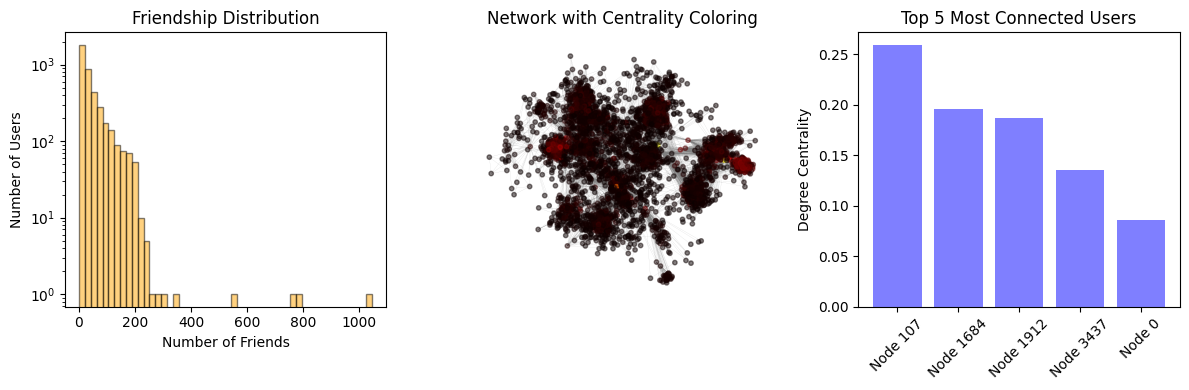

In [4]:
# creating space for figures (1 row and 3 columns)
plt.figure(figsize=(12, 4))

# creating first plot at position 1
plt.subplot(1, 3, 1)
plt.hist(degrees, bins=50, alpha=0.5, color='orange', edgecolor='black') # histogram with 50 bins using degrees (number of friends for each user)
plt.xlabel('Number of Friends')
plt.ylabel('Number of Users')
plt.title('Friendship Distribution')
plt.yscale('log') # log-scaling to see data easier

# plot 2 at position 2
plt.subplot(1, 3, 2)
position = nx.spring_layout(g) # positioned with heavily connected nodes together and unconnected nodes farther apart
node_degrees = [g.degree(n) for n in g.nodes()] # degree values for each node (and connections) in the network
nx.draw(g, position, node_size=10, node_color=node_degrees, # draw graph and color based on degree (number of friends) 
        cmap='hot', alpha=0.5, edge_color='gray', width=0.1)
plt.title('Network with Centrality Coloring')

# plot for top 5 degree centrality nodes
plt.subplot(1, 3, 3)
top_5 = [sorted_degrees[i][0] for i in range(5)] # getting node id for each tuple in the list for highest 5
scores = [degree_centrality[n] for n in top_5] # getting centrality proportions/scores for each node id(top 5)
plt.bar(range(5), scores, color='blue', alpha=0.5)
plt.xticks(range(5), [f'Node {n}' for n in top_5], rotation=45) # labeling x axis with corresponding node id (top 5) 
plt.ylabel('Degree Centrality')
plt.title('Top 5 Most Connected Users')

plt.tight_layout() # spacing properly
plt.show() 

In [ ]:
# top 3 central/important nodes from degree, betweeness, and eigen centrality
top_nodes = [107, 1684, 1912]

for node_id in top_nodes:
    # ego network with radius 2 (friends + friends of friends)
    ego_subgraph = nx.ego_graph(g, node_id, radius=2)
    
    print(f"\nEgo Network for Node {node_id}:")
    print(f"Nodes in ego graph: {len(ego_subgraph.nodes())}")
    print(f"Edges in ego graph: {len(ego_subgraph.edges())}")
    print(f"Direct connections (degree): {g.degree(node_id)}")
    
    # exporting to GraphML format for Gephi
    filename = f"node_{node_id}_ego_graph.graphml"
    nx.write_graphml(ego_subgraph, filename)
    print(f"Exported to: {filename}")


Ego Network for Node 107:
Nodes in ego graph: 2687
Edges in ego graph: 58061
Direct connections (degree): 1045
Exported to: node_107_ego_graph.graphml

Ego Network for Node 1684:
Nodes in ego graph: 1831
Edges in ego graph: 42585
Direct connections (degree): 792
Exported to: node_1684_ego_graph.graphml

Ego Network for Node 1912:
Nodes in ego graph: 1003
Edges in ego graph: 33999
Direct connections (degree): 755
Exported to: node_1912_ego_graph.graphml
